## Wczytanie danych

In [29]:
import pandas as pd
import numpy as np

df = pd.read_csv("data/AirQualityUCI.csv", sep=";", decimal=",")
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578,NaN,NaN
1,10/03/2004,19.00.00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255,NaN,NaN
2,10/03/2004,20.00.00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502,NaN,NaN
3,10/03/2004,21.00.00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867,NaN,NaN
4,10/03/2004,22.00.00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Usuwanie niepotrzebnych danych

Na podstawie wniosków z pliku `initial_analysis.ipynb` usuwam zbędne wiersze i kolumny (o kolumnach `Time` i `Date` wspomniano w rozdziale *Selekcja cech*). Wartość -200 została przekonwertowana na NaN, zgodnie z opisem danych.

In [30]:
df = df[:-114]
df = df.drop(columns=["Time", "Date", "Unnamed: 15", "Unnamed: 16"])
df.replace(-200.0, np.nan, inplace=True)
print("Data shape:", df.shape)

Data shape: (9357, 13)


Wstępnie dane mają 13 kolumn i 9357 wierszy

## Sprawdzanie typów danych

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CO(GT)         7674 non-null   float64
 1   PT08.S1(CO)    8991 non-null   float64
 2   NMHC(GT)       914 non-null    float64
 3   C6H6(GT)       8991 non-null   float64
 4   PT08.S2(NMHC)  8991 non-null   float64
 5   NOx(GT)        7718 non-null   float64
 6   PT08.S3(NOx)   8991 non-null   float64
 7   NO2(GT)        7715 non-null   float64
 8   PT08.S4(NO2)   8991 non-null   float64
 9   PT08.S5(O3)    8991 non-null   float64
 10  T              8991 non-null   float64
 11  RH             8991 non-null   float64
 12  AH             8991 non-null   float64
dtypes: float64(13)
memory usage: 950.4 KB


Po wczytaniu danych, wszystkie kolumny mają typ danych float. W repozytorium z oryginalnymi danych jest podana informacja o typach danych dla każdej kolumny i są zdefiniowane 3 takie typy: Integer (int), Categorical (object) i Continuous (float). Jednak typ Categorical dla kolumn `PT08.S1(CO)`,  `PT08.S2(NMHC)`, `PT08.S3(NOx)`, `PT08.S4(NO2)` i `PT08.S5(O3)` jest błędny ponieważ wartości w tych kolumnach są odpowiedziami sensoru a więc powinny być enkodowane jako liczby. Można by było przekonwertować odpowiednie kolumny z float64 do int, ale ponieważ zbiór jest mały, nie ma w tym dużego sensu, dlatego zostawiam float64 dla wszystkich kolumn, bo nie wpływa to na dalszą analizę.

## Kolumny o zerowej wariancji

Kolumny o zerowej wariancji - kolumny w zbiorze, w których wszystkie wartości są identyczne. Jeżeli wartości są jednakowe dla całej kolumny to nie ta kolumna nie wnoszi nowej informacji przy trenowaniu modeli. Sprawdzam czy są takie w zbiorze

In [32]:
zero_var_cols = [col for col in df.columns if df[col].nunique() == 1]
print("Zero variance columns:", zero_var_cols)

Zero variance columns: []


Nie ma kolumn o zerowej wariancji

## Usuwanie zduplikowanych wierszy

Podobnie z zduplikowanymi wierszami, nie ma sensu od dwóch jednakowych wierszy, bo nie wnosi to nowej informacji do modelu, więc sprawdzam czy są takie w zbiorze.

In [33]:
print("Liczba zduplikowanych wierszy:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

Liczba zduplikowanych wierszy: 31


Są 31 zduplikowanych, wierszy 

## Usuwanie wartości brakujących

In [34]:
df.isna().sum()

CO(GT)           1653
PT08.S1(CO)       335
NMHC(GT)         8412
C6H6(GT)          335
PT08.S2(NMHC)     335
NOx(GT)          1608
PT08.S3(NOx)      335
NO2(GT)          1611
PT08.S4(NO2)      335
PT08.S5(O3)       335
T                 335
RH                335
AH                335
dtype: int64

Pierwsze co jest zauważalne, to duża liczba wartości brakujących w kolumnie NMHC(GT) (8412 / 9326). Ponieważ wartości pustych jest kilka razy więcej niż rzeczywistych, nie ma sensu coś robić z tą kolumną bo będzie ona sztucznie utworzona. Dlatego usuwam ją

In [35]:
df = df.drop("NMHC(GT)", axis=1)

Kilka kolumn (PT08.S1(CO), C6H6(GT), PT08.S2(NMHC) itp.) mają taką samą liczbę wartości pustych (335), sprawdzam czy to nie są te same wiersze jak w przypadku ostatnich 144 w zbiorze początkowym.

In [36]:
df[df["PT08.S1(CO)"].isna()].drop(["CO(GT)", "NOx(GT)", "NO2(GT)"], axis = 1)

,PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
701,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8112,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8113,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Faktycznie, tak jest. Usuwam te wiersze, bo wszystkie wartości w nich są puste, a ich liczba jest mała w porównaniu do całego zbioru

In [37]:
df = df.drop(
    df[df["PT08.S1(CO)"].isna()].drop(["CO(GT)", "NOx(GT)", "NO2(GT)"], axis = 1).index
    ).reset_index(drop=True)

Sytuacja z kolumnami CO(GT), NOx(GT), NO2(GT) jest niejednoznaczna. Z jednej strony, liczba wierszy jest zaduża aby usuwać ich ze zbioru (około 20%). Z drugiej, nie możemy usunąć 3 kolumn ze zbioru, ponieważ mają w sobie wartości, które będą wykorzystane do modelowania. Dlatego, odpowiednim sposobem będzie raczej imputacja. Istnieje kilka metod imputacji od prostych, do bardziej złożonych:
- Imputacja wartością stałą
- Imputacja średnią/medianą/percentylami
- Interpolacja
- Imputacja za pomocą metod ML (KNN, Random Forest, Decision Trees)

Ponieważ wypełniania stałą wartością (nie ma różnicy czy średnią czy zerem) zniekształca rozkład zmiennej, robiąc imputowaną wartość dominującą, wybieram KNN imputację, czyli na podstawie podobnych obserwacji ze zbioru.

## Data Leakage

Data Leakage (wyciek danych) – jeden z najczęstszych problemów w projektach ML/DS. Występuje wtedy, gdy informacje ze zbioru testowego zostaną nieświadomie wykorzystane podczas trenowania modelu, np. poprzez wcześniejsze przetwarzanie danych (skalowanie, imputację braków, itp.) na całym zbiorze danych przed podziałem na zbiór treningowy i testowy. To prowadzi do zawyżonych wyników na etapie walidacji i sprawia, że model gorzej generalizuje do nowych, rzeczywistych danych.

## Train / Val / Test split

Aby uniknąć wycieku danych podzielę zbiór danych do jakichkolwiek przekształceń. W celu uzyskanie bardziej obiektywnej oceny w ewaluacji modelu, tworzę 3 zbiory zamiast 2 standardowych (drugi najczęstszy problem w projektach), ponieważ zbudowanie dobrego modelu uczenia maszynowego to pętla, która ma w sobie kilkadziesiąt / kilkaset iteracji. Pod czas tych iteracji, coś zmieniamy w modelu lub danych (np. metodę przetwarzania lub zmiana hyperparametrów modelu) i w ten sposób możemy przeuczyć model na obserwacjach ze zbioru testowego, a z tego wynika zła generalizacja i zła ocena modelu. Dlatego dzielę zbiór na trzy podzbiory:
1. Traning set (do trenowania)(80%) - zbiór wykorzystywany do uczenia modelu (wyznaczania parametrów, pozyskiwania patternów)
2. Validation set (do ewaluacji)(10%) - zbiór wykorzystywany do wyboru najlepszego modelu (tuningu hyperparametrów, porównania modeli)
3. Test set (do końcowej ewaluacji)(10%) - zbiór, który jest odkładany do ostatniego etapu ewaluacji wybranym najlepszym modelem, żadnych zmian w danych/modelu po ewaluacji nie wykonuje się

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop("C6H6(GT)", axis=1)
y = df["C6H6(GT)"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.2, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

X_train.shape, X_val.shape, X_test.shape

((7192, 11), (899, 11), (900, 11))

Po podzieleniu mamy 7192 obserwacje w zbiorze treningowym i po 900 w zbiorach walidacyjnym i testowym

## KNN Imputacja

In [39]:
from sklearn.impute import KNNImputer

imputer = KNNImputer()

X_train_imputed = pd.DataFrame(imputer.fit_transform(X_train), columns=X_train.columns, index=X_train.index)
X_val_imputed = pd.DataFrame(imputer.transform(X_val), columns=X_val.columns, index=X_val.index)
X_test_imputed = pd.DataFrame(imputer.transform(X_test), columns=X_test.columns, index=X_test.index)

In [40]:
X_train_imputed.isna().sum().sum(), X_val_imputed.isna().sum().sum(), X_test_imputed.isna().sum().sum()

(0, 0, 0)

## Wartości odstające

Identyfikuję wartości odstające za pomocą wykresów pudełkowych

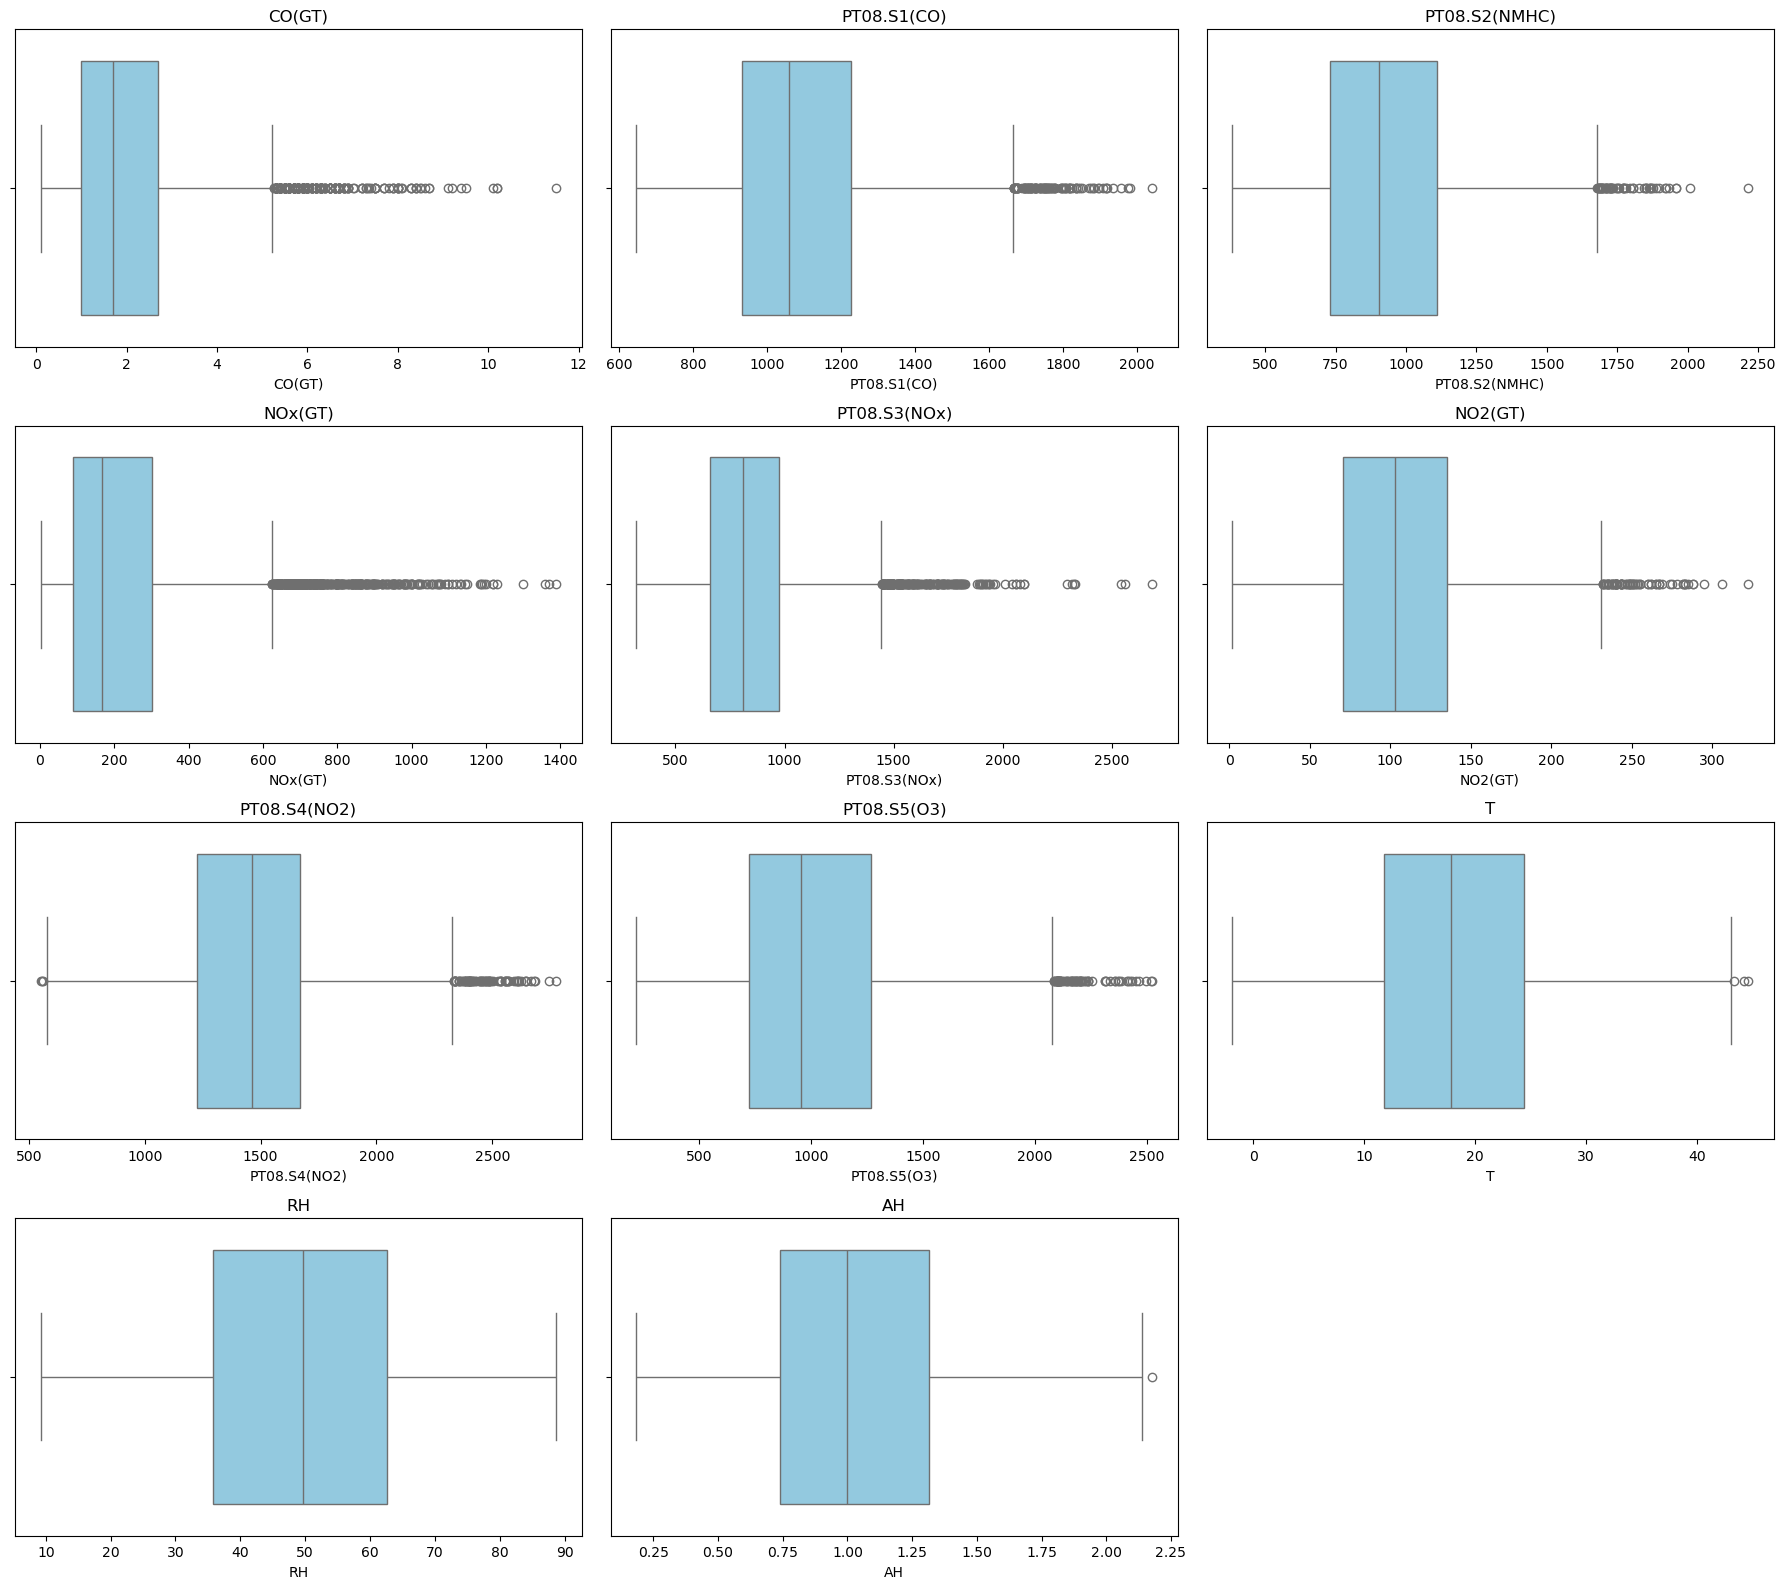

In [41]:
import math
import matplotlib.pyplot as plt
import seaborn as sns

cols = X_train_imputed.columns
n = len(cols)
cols_per_row = 3
rows = math.ceil(n / cols_per_row)

fig, axes = plt.subplots(rows, cols_per_row, figsize=(18, rows * 4))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(x=X_train_imputed[col], ax=axes[i], color="skyblue")
    axes[i].set_title(col)

for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()


Boxploty pokazują, że są wartości odstające we wszystkich kolumnach oprócz RH, ale nie widać dokładnie ile ich jest

### Metoda IQR

Do wyznaczania wartości odstających korzystam z metody IQR (interquartile range) czyli rozstępu międzykwartylowego. Metoda ta nie jest zależna od rozkładu cechy (jak np. z-score method), a więc bez sprawdzania histogramów obliczam róznicę między trzecim a pierwszym kwartylami i obliczam outliery poza dolną i górną granicami. Dolna i górna granice są zdefiniowane jako Q1 - 1.5 * IQR i Q3 + 1.5 * IQR odpowiednio.

In [42]:
numeric_cols = X_train_imputed.select_dtypes(include=[np.number])

Q1 = numeric_cols.quantile(0.25)
Q3 = numeric_cols.quantile(0.75)
IQR = Q3 - Q1

is_outlier = (numeric_cols < (Q1 - 1.5 * IQR)) | (numeric_cols > (Q3 + 1.5 * IQR))

outliers_per_column = is_outlier.sum()
print("Liczba outlierów w zbiorze treningowym:\n\n", outliers_per_column)

total_outliers = is_outlier.sum().sum()
rows_w_outliers = len(X_train_imputed[is_outlier.any(axis=1)])

print(f"\nŁącznie {total_outliers} wartości odstających w {rows_w_outliers} wierszach.")

Liczba outlierów w zbiorze treningowym:

 CO(GT)           248
PT08.S1(CO)      100
PT08.S2(NMHC)     58
NOx(GT)          399
PT08.S3(NOx)     195
NO2(GT)           75
PT08.S4(NO2)      83
PT08.S5(O3)       69
T                  3
RH                 0
AH                 1
dtype: int64

Łącznie 1231 wartości odstających w 735 wierszach.


Sytuacja z wartościami odstającymi jest rózna dla każdej kolumny i niejednoznaczna dla całego zbioru. Mianowicie, w kolumnach `CO(GT)`, `NOx(GT)` oraz `PT08.S3(NOx)` jest duża outlierów, natomiast w kolumnach `T`, `RH`, `AH` - mała, w pozostalych - średnio. Łącznie wartości odstające są w 735 wierszach zbioru treningowego, czyli około 10% całego. 

Metoda obróbki wartości odstających w większości załeży od charakteru danych i celów projektu, najbardziej popularnymi metodami są:

- Nie robić żadnych przekształceń
- Usuwanie wierszów z outlierami
- Obcinanie wartości do dolnej / górnej granicy

Ponieważ końcowym celem jest zbudowanie modelu regresyjnego, a są modele odporne na wartości odstające (XGBoost, DecisionTree, LightGBM itp.) to w celach tego projektu nie będę ani usuwać, ani obcinać wartości odstających. Outliery to nie zawsze jest cós złego i na pewno nie to same co wartości brakujące. Nie mamy dostępnej informacji czy są to błędy czujników, czy realne wartości. Ewentualnie sprawdzam czy wpływają oni na model

In [43]:
X_train_clipped = X_train_imputed.copy()

for col in numeric_cols.columns:
    Q1 = X_train_imputed[col].quantile(0.25)
    Q3 = X_train_imputed[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    X_train_clipped[col] = np.clip(X_train_imputed[col], lower_bound, upper_bound)


outliers = ~is_outlier.any(axis=1)
X_train_removed_outliers = X_train_imputed[outliers]
y_train_removed_outliers = y_train[outliers]

In [44]:
def build_and_evaluate(X_train, y_train, X_val, y_val):

    from xgboost import XGBRegressor
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error

    model = XGBRegressor()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_xgb = np.sqrt(mean_squared_error(y_val, y_pred))

    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse_xgb, rmse_lr

rmse_imputed, rmse_imputed_lr = build_and_evaluate(X_train_imputed, y_train, X_val_imputed, y_val)
rmse_clipped, rmse_clipped_lr = build_and_evaluate(X_train_clipped, y_train, X_val_imputed, y_val)
rmse_removed_outliers, rmse_removed_outliers_lr = build_and_evaluate(X_train_removed_outliers, y_train_removed_outliers, X_val_imputed, y_val)

print("XGBoost RMSE (odporny na outliers):")
print(f"RMSE for data with outliers: {rmse_imputed:.2f}")
print(f"RMSE for clipped outliers: {rmse_clipped:.2f}")
print(f"RMSE for removed outliers: {rmse_removed_outliers:.2f}")

print("\nLinear Regression RMSE (wrażliwy na outliers):")
print(f"RMSE for data with outliers: {rmse_imputed_lr:.2f}")
print(f"RMSE for clipped outliers: {rmse_clipped_lr:.2f}")
print(f"RMSE for removed outliers: {rmse_removed_outliers_lr:.2f}")

XGBoost RMSE (odporny na outliers):
RMSE for data with outliers: 0.35
RMSE for clipped outliers: 0.45
RMSE for removed outliers: 1.36

Linear Regression RMSE (wrażliwy na outliers):
RMSE for data with outliers: 1.18
RMSE for clipped outliers: 1.17
RMSE for removed outliers: 1.30


Zarówno dla modelu odpornego (XGBoost) na wartości odstające i wrażliwego (Linear Regression) RMSE w przypadku danych z wartościami odstającymi jest niski w porównaniu do innych metod. To potwierdza wybraną wcześniej metodę obróbki wartości odstających. 

In [45]:
X_train = X_train_imputed.copy()
X_val = X_val_imputed.copy()
X_test = X_test_imputed.copy()

## Selekcja Cech

Im więcej cech tym złożoniejszy jest model. Zaleca się trenować modele najbardziej proste, aby zminimalizować koszt trenowania / predykcji, można było łatwiej interpretować cechy ważność cech (Feature Importance) np. w XAI i tp. W tym celu, przeanalizuję kolumny zbioru aby wybrać najbardziej odpowiednie.

## Kolumny nie potrzebne do analizy

Oryginalny zbiór zawiera kolumny `Date` i `Time`, ale nie potrzebujemy ich w celu modelowania, więc usunąłem ich wraz po wczytaniu danych. 

## Kolumny o zerowej wariancji

Kolumny o zerowej wariancji - kolumny w zbiorze, w których wszystkie wartości są identyczne. Jeżeli wartości są jednakowe dla całej kolumny to nie ta kolumna nie wnoszi nowej informacji przy trenowaniu modeli. Sprawdzam czy są takie w zbiorze

In [46]:
zero_var_cols = [col for col in X_train.columns if X_train[col].nunique() == 1]
print("Zero variance columns:", zero_var_cols)

Zero variance columns: []


Nie ma kolumn o zerowej wariancji

## Redundancy

Redundancja, czyli nadmiarowość, wynika w przypadku, gdy predyktory są mocno skorelowane między sobą, zawierając podobną informację. Choć takie cechy nie są błędnymi, jednak mają negatywny wpływ na złożoność modelu, interpretację wyników, ryzyko overfittingu. Dlatego, na podstawie macierzy korelacji pomiędzy cechami oraz korelacji cech i targetu wybieram te, który mają niską korelacje pomiędzy sobą a najwyższą możliwą ze zmienną objaśnianą.

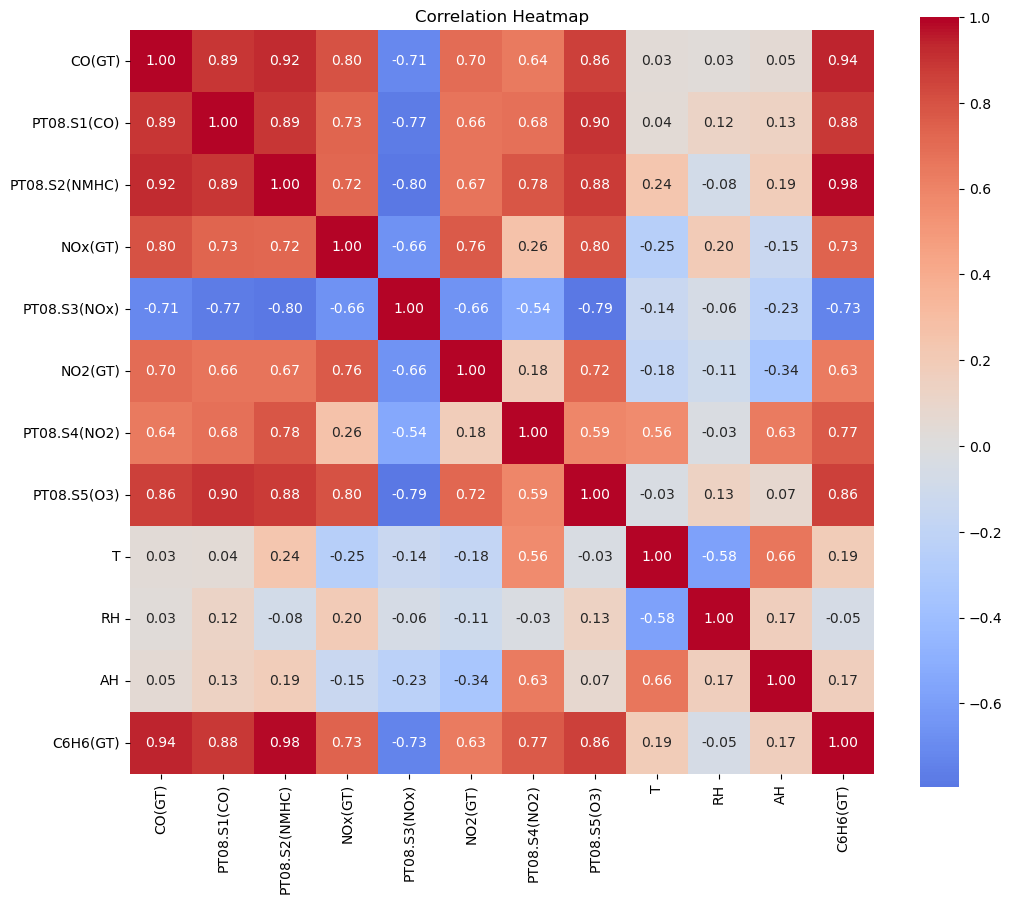

In [47]:
df_corr = pd.concat([X_train, y_train], axis=1)
corr = df_corr.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, center = 0)
plt.title("Correlation Heatmap")
plt.show()

W tym zbiorze, jak w podobnych, które zawierają dane o jakości powietrza jest problem redundancji, ponieważ większość cech jest silnie skorelowana pomiędzy sobą. I można w takim przypadku zrobić na 4 sposoby:
1. Spróbować wybrać cechy ręcznie
2. Wykonać PCA, czyli redukcję wymiarowości
3. Wykorzystać gotową metodę do selekcji cech (np. SelectKBest)
4. Zostawić jak jest

Ponieważ końcowym celem jest zbudowanie jaknajlepszego modelu predykcyjnego (czyli z najmniejszym błędem), podobnie jak z wartościami odstającymi, testuję wszystkie opcje, trenując najprostszy model.

C6H6(GT) jest zmienną objasnianą, więc skupiam się na korelacji predyktorów z nią. PT08.S2(NMHC) ma największy wsp. korelacji z nią więc wybieram tą kolumnę jako zmienną objaśniająca i usuwam te cechy, które silnie (>0.7) są skorelowane

In [48]:
columns_to_drop_manual = ["CO(GT)", "PT08.S1(CO)", "NOx(GT)", "PT08.S3(NOx)", 'PT08.S4(NO2)', 'PT08.S5(O3)']

X_train_manual = X_train.drop(columns=columns_to_drop_manual)
X_val_manual = X_val.drop(columns=columns_to_drop_manual)

print("Liczba kolumn po usunięciu manualnym:", X_train_manual.shape[1])

Liczba kolumn po usunięciu manualnym: 5


In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)

print("Liczba kolumn po PCA:", X_train_pca.shape[1])

Liczba kolumn po PCA: 3


Wadą PCA jest utrata interpretowalności cech (bo są to kombinacje liniowe oryginalnych), co może utrudniać wyjaśnianie wyników modelu.

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(score_func=f_regression, k=5)
X_train_kbest = selector.fit_transform(X_train, y_train)
X_val_kbest = selector.transform(X_val)
print("Liczba kolumn po SelectKBest:", X_train_kbest.shape[1])

Liczba kolumn po SelectKBest: 5


In [51]:
rmse_orig, rmse_orig_lr = build_and_evaluate(X_train, y_train, X_val, y_val)
rmse_manual, rmse_manual_lr = build_and_evaluate(X_train_manual, y_train, X_val_manual, y_val)
rmse_pca, rmse_pca_lr = build_and_evaluate(X_train_pca, y_train, X_val_pca, y_val)
rmse_kbest, rmse_kbest_lr = build_and_evaluate(X_train_kbest, y_train, X_val_kbest, y_val)

print("XGBoost RMSE (oryginalne dane):", rmse_orig)
print("XGBoost RMSE (usunięte ręcznie):", rmse_manual)
print("XGBoost RMSE (PCA):", rmse_pca)
print("XGBoost RMSE (SelectKBest):", rmse_kbest)

print("\nLinear Regression RMSE (oryginalne dane):", rmse_orig_lr)
print("Linear Regression RMSE (usunięte ręcznie):", rmse_manual_lr)
print("Linear Regression RMSE (PCA):", rmse_pca_lr)
print("Linear Regression RMSE (SelectKBest):", rmse_kbest_lr)

XGBoost RMSE (oryginalne dane): 0.3460492680167805
XGBoost RMSE (usunięte ręcznie): 0.5507019851134495
XGBoost RMSE (PCA): 1.9760168198703294
XGBoost RMSE (SelectKBest): 0.5104304904139009

Linear Regression RMSE (oryginalne dane): 1.1758562616031005
Linear Regression RMSE (usunięte ręcznie): 1.3627617601667226
Linear Regression RMSE (PCA): 2.3743754204362375
Linear Regression RMSE (SelectKBest): 1.322532397359445


Sytuacja jest podobna do outlierów. Zarówno odporny na redundancję XGBoost jak i wrażliwy Linear Regeression model pokazują najmniejszy błąd dla danych bez usuwania kolumn. Po PCA jest najgorzy rezultat, oprócz faktu, że tracimy interpretację cech. Ponieważ przyszłe modele nie są skoplikowane, wielkość datasetu nie jest duża a trenowanie modelu zajmuje mniej niż sekundę, to nie będę usuwać żadnych kolumn. Choć i so skorelowane między sobą i jedna wyjaśnia drugą, ale razem wnoszą dodatkową informację, która jest ważna do predykcji. 

In [52]:
train_cleaned = pd.concat([X_train, y_train], axis=1)
train_cleaned.to_csv("data/train_cleaned.csv", index=False)

val_cleaned = pd.concat([X_val, y_val], axis=1)
val_cleaned.to_csv("data/val_cleaned.csv", index=False)

test_cleaned = pd.concat([X_test, y_test], axis=1)
test_cleaned.to_csv("data/test_cleaned.csv", index=False)